# Diabetes Predictor for Female Pima Native Americans

## About 
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.



### Content

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

 -  Pregnancies: Number of times pregnant
 - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
 - BloodPressure: Diastolic blood pressure (mm Hg)
 - SkinThickness: Triceps skin fold thickness (mm)
 - Insulin: 2-Hour serum insulin (mu U/ml)
 - BMI: Body mass index (weight in kg/(height in m)^2)
 - DiabetesPedigreeFunction: Diabetes pedigree function
 - Age: Age (years)
 - Outcome: Class variable (0 or 1)


### Sources
(a) Original owners: National Institute of Diabetes and Digestive and
Kidney Diseases
(b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
Research Center, RMI Group Leader
Applied Physics Laboratory
The Johns Hopkins University
Johns Hopkins Road
Laurel, MD 20707
(301) 953-6231
(c) Date received: 9 May 1990

Dataset and above "About" Section obtained from Mehmet Akturk @ https://www.kaggle.com/datasets/mathchi/diabetes-data-set


# Importing Dataset and Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import itertools


In [3]:
# read csv file into a dataframe
df = pd.read_csv("health_care_diabetes.csv") 

In [4]:
# view of dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# determine number of columns and row
df.shape

(768, 9)

In [6]:
# Display data types for each column and any null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Confirming absence of null values
df.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Here we determine the number of zeros per column which are likely to be placeholders for null values
(df == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [9]:
# now we will replace these zeros in each column with the respective median value for that column
medians = {}
for column in df:
  medians[column] = (df[column].median())
# remove columns where zero value is appropriate
del medians['Pregnancies']
del medians['Outcome']
for key in medians:
  df[key].replace(to_replace=0, value= medians[key], inplace=True)


The dataset is now imported and cleaned and we may begin to explore the dataset.

# Exploratory Data Analysis

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We will now visualize these statistics:

[Text(0.5, 1.0, 'Outcome')]

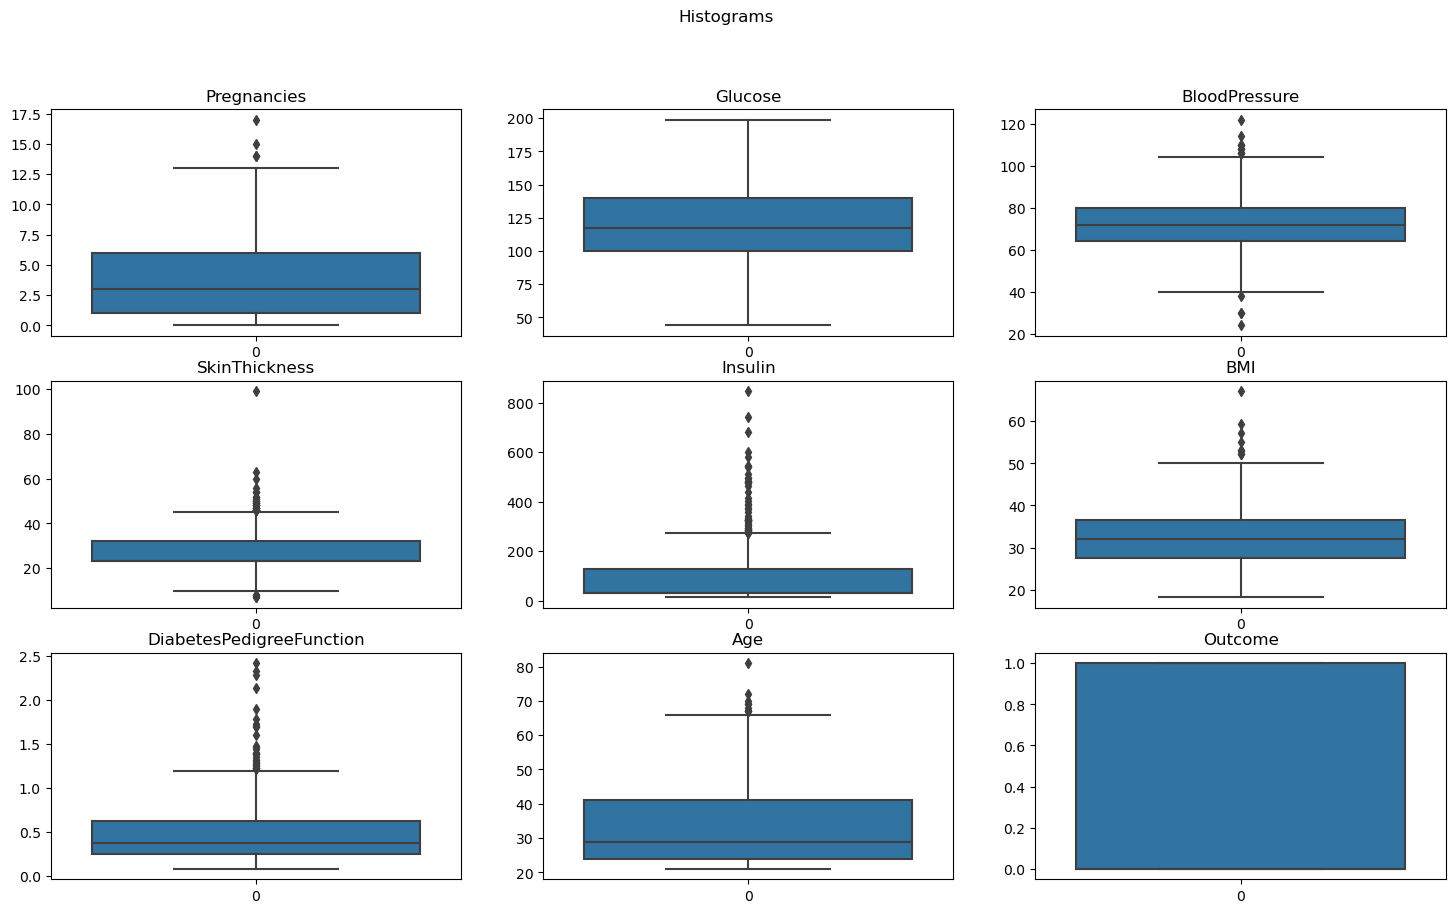

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
 
fig.suptitle('Histograms')

sns.boxplot(ax=axes[0, 0], data=df['Pregnancies']).set(title='Pregnancies')
sns.boxplot(ax=axes[0, 1], data=df['Glucose']).set(title='Glucose')
sns.boxplot(ax=axes[0, 2], data=df['BloodPressure']).set(title='BloodPressure')
sns.boxplot(ax=axes[1, 0], data=df['SkinThickness']).set(title='SkinThickness')
sns.boxplot(ax=axes[1, 1], data=df['Insulin']).set(title='Insulin')
sns.boxplot(ax=axes[1, 2], data=df['BMI']).set(title='BMI')
sns.boxplot(ax=axes[2, 0], data=df['DiabetesPedigreeFunction']).set(title='DiabetesPedigreeFunction')
sns.boxplot(ax=axes[2, 1], data=df['Age']).set(title='Age')
sns.boxplot(ax=axes[2, 2], data=df['Outcome']).set(title='Outcome')

From the boxplots we can see that the Insulin, Skin-Thicknes, BMI, and Diabetes-Pedigree-Function variables have a particularly high number of outliers. From here, we will view the distribution of the insulin levels data, as well as take a more in-depth look at insulin and its various relationships. 

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

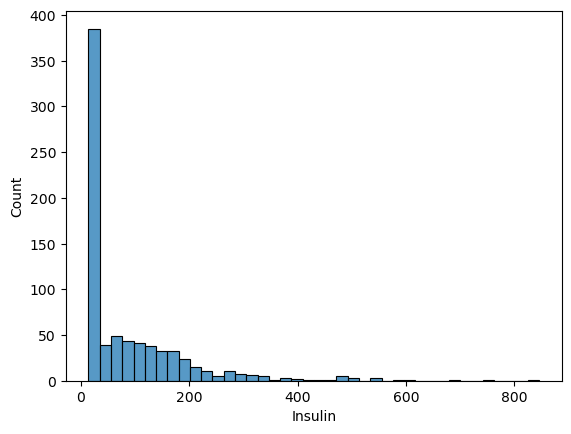

In [12]:
sns.histplot(data=df['Insulin'])

As seen above and also in the boxplot for insulin, there are a large number of outliers. From the above histogram we can see that most insulin levels fall below 200. A normal insulin level 2 hours post-prandial is noted as 16 - 166 mIU/L 

(https://emedicine.medscape.com/article/2089224-overview?form=fpf). 

We will now look at a correlation table for all of the variables:

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Insulin appears to be most strongly correlated with glucose levels and glucose levels appear to have the highest correlation with our target variable. As such, we will now take a closer look at our glucose variable and the relationship between glucose, insulin, and our target feature.

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

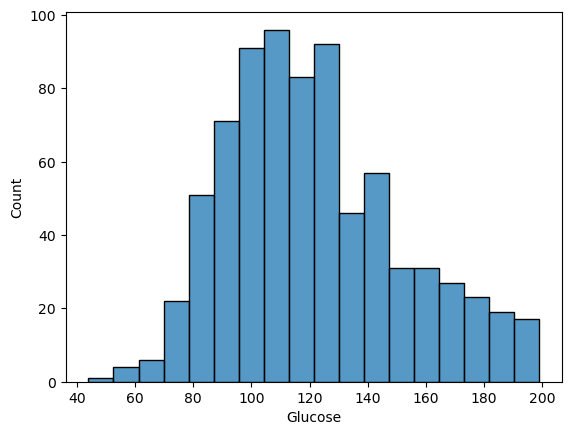

In [15]:
sns.histplot(data=df['Glucose'])

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

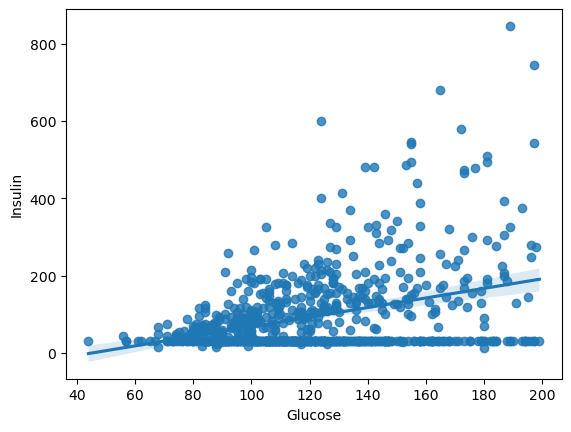

In [16]:
sns.regplot(x=df['Glucose'], y=df['Insulin']) 


We will now see which of the variables hold statistical signifigance with respect to our target variable.

In [17]:
pearson = {}
for variable in df.columns:
    signifigant = False
    pearCoef, pVal = stats.pearsonr(df[variable], df['Outcome'])
    if pVal < .001:
        signifigant = True
    pearson[variable] = (pearCoef, pVal, signifigant)
stats_df = pd.DataFrame(pearson).transpose()
stats_df.columns = ['Correlation Coef','P-Value', 'Signifigant']


In [18]:
stats_df

,Correlation Coef,P-Value,Signifigant
Pregnancies,0.221898,0.0,True
Glucose,0.492782,0.0,True
BloodPressure,0.165723,0.000004,True
SkinThickness,0.189065,0.0,True
Insulin,0.148457,0.000036,True
BMI,0.312249,0.0,True
DiabetesPedigreeFunction,0.173844,0.000001,True
Age,0.238356,0.0,True
Outcome,1.0,0.0,True


We can see that based on P-Values, all of our variables are statistically significant when determining the outcome variable. Additionally, all our variables are positively associated with our target.

# Developing A Model For Classification

### Decision Tree
We will begin model development by creating a baseline decision tree:

In [19]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = df['Outcome']

In [20]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [21]:
diabetesTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


In [22]:
diabetesTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [23]:
predTree = diabetesTree.predict(X_testset)

In [24]:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.70995670995671


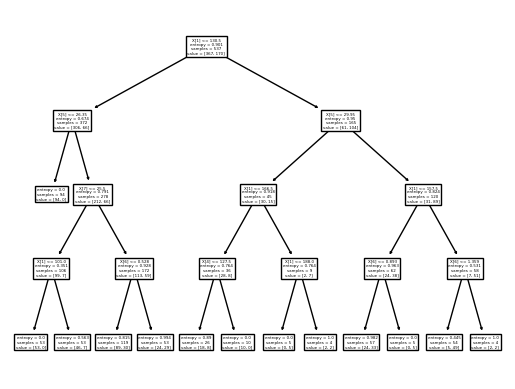

In [25]:
tree.plot_tree(diabetesTree)
plt.show()

### Logistic Regression Model

Now we will develop a baseline logistic regression model:

In [26]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [27]:
# wheras with our decision tree we did not have to scale our data, here with logistic regression we must

X = preprocessing.StandardScaler().fit(X).transform(X)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [28]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)


In [29]:
yPredicted = LR.predict(X_testset)


In [30]:
metrics.accuracy_score(y_testset, yPredicted)

0.7402597402597403

# Model Tuning and Refinement

Now that we have developed our models, we can begin to refine them for better prediction accuracy.

### Decision Tree Tuning

Currently, our accuracy score with the above decision tree is 0.7142857142857143. We will take two steps in an attempt to increase the decision tree's accuracy:
1) Feature Selection
2) Tree Depth Optimization

#### Feature Selection- Brute Force Approach

In [31]:
# creating a list of all possible combinations for all lengths
variables = list(df.columns)
variables.remove("Outcome")
allCombos = []
for i in range(1,len(variables)+1):
  allCombos.append(list(itertools.combinations(variables, i)))

In [32]:
# testing all possible combinations to determine maximum accuracy
maxAccuracy = 0
d1 = {}
for i in range(len(allCombos)):
  for variablesL in allCombos[i]:
    X = df[list(variablesL)]
    y = df['Outcome']
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
    diabetesTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
    diabetesTree.fit(X_trainset,y_trainset)
    predTree = diabetesTree.predict(X_testset)
    if metrics.accuracy_score(y_testset, predTree) > 0.7142857142857143:
      maxAccuracy = metrics.accuracy_score(y_testset, predTree)
      d1[maxAccuracy] = variablesL


print("Max Accuracy is: ", maxAccuracy, "\nFor DecisionTree with parameters:")
for param in d1[max(d1)]:
  print("-", " ", param)

Max Accuracy is:  0.7229437229437229 
For DecisionTree with parameters:
-   Pregnancies
-   Glucose
-   BloodPressure
-   SkinThickness
-   BMI


Now we have found that we can increase the accuracy of our model slightly by only considering Pregnancies, Glucose, BloodPressure, SkinThickness, and BMI.
We will now use these features in determining the optimal Decision Tree Depth. 

#### Tree Depth Optimization- Brute Force Approach

In [33]:
# determine length of best performing decision tree
d2 = {}
for i in range(1,10):
  X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI']]
  y = df['Outcome']
  X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
  diabetesTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
  diabetesTree.fit(X_trainset,y_trainset)
  predTree = diabetesTree.predict(X_testset)
  if metrics.accuracy_score(y_testset, predTree) > maxAccuracy:
      maxAccuracy = metrics.accuracy_score(y_testset, predTree)
      d2[maxAccuracy] = i
print("Max Accuracy is: ", maxAccuracy, "\nFor DecisionTree with depth: ", d2[max(d2)])



Max Accuracy is:  0.7316017316017316 
For DecisionTree with depth:  5


We have now found that our maximum accuracy with using a decision tree is ~0.731 when providing a depth of 5 and using the features: Pregnancies, Glucose, BloodPressure, SkinThickness, and BMI. Thus, the accuracy was increased by ~0.02 by tuning the depths and parameters we used.

#### Extending Our Decision Tree
Now we may consider extending our decision tree approach by implementing a Random Forest Classifier and comparing their accuracies.

In [43]:
# Here will once again not scale our data
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values

In [50]:
i = 0
sum = 0
while i < 20:
  X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
  forest = RandomForestClassifier().fit(X_trainset, y_trainset)
  yPredicted = forest.predict(X_testset)
  sum += metrics.accuracy_score(y_testset, yPredicted)
  i+=1
sum/20

0.740909090909091

We can now see that by using a Random Forest for classification, the accuracy improve from ~0.731 to ~0.740.


Now we will try to optimize our Random Forest by Feature Selection:

In [56]:
dLRF = {}
maxAccuracyRF = 0.0

for i in range(len(allCombos)):
  for variablesL in allCombos[i]:
    X =  df[list(variablesL)]
    y = df['Outcome']
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
    forest = RandomForestClassifier().fit(X_trainset, y_trainset)
    yPredicted = forest.predict(X_testset)
    score = metrics.accuracy_score(y_testset, yPredicted)
    
    if score > maxAccuracyRF:
      maxAccuracyRF = score
      dLRF[maxAccuracyRF] = variablesL
print("Max Accuracy is: ", maxAccuracyRF, "\nFor Random Forest with parameters:")
for param in dLRF[max(dLRF)]:
  print("-", " ", param)

Max Accuracy is:  0.7619047619047619 
For Random Forest with parameters:
-   Glucose
-   BloodPressure
-   BMI
-   DiabetesPedigreeFunction
-   Age


Here we were able to slightly increase our models accuracy from ~0.740 to ~0.76. Yet each time the model is ran, a different set of variables seems to produce the maximum accuracy. Thus, it is inconclusive at this time for which set of variables best optimize the Random Forest.

### Logistic Regression Tuning


In [54]:
# determine best features to use in model
dLR = {}
maxAccuracyLR = 0.0

for i in range(len(allCombos)):
  for variablesL in allCombos[i]:
    X =  df[list(variablesL)]
    y = df['Outcome']
    X = preprocessing.StandardScaler().fit(X).transform(X)
    X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
    yPredicted = LR.predict(X_testset)
    score = metrics.accuracy_score(y_testset, yPredicted)
    
    if score > maxAccuracyLR:
      maxAccuracyLR = score
      dLR[maxAccuracyLR] = variablesL
print("Max Accuracy is: ", maxAccuracyLR, "\nFor Logistic Regression with parameters:")
for param in dLR[max(dLR)]:
  print("-", " ", param)



Max Accuracy is:  0.7489177489177489 
For Logistic Regression with parameters:
-   Pregnancies
-   Glucose
-   BloodPressure
-   BMI
-   DiabetesPedigreeFunction


### Model Evaluation Summary

##### Logistic Regression
Max Accuracy is:  ~0.7489177489177489 
For Logistic Regression with parameters:
-   Pregnancies
-   Glucose
-   BloodPressure
-   BMI
-   DiabetesPedigreeFunction
##### Decision Tree
Max Accuracy is:  ~0.7316017316017316  
For DecisionTree with parameters:
-   Depth: 5
-   Pregnancies
-   Glucose
-   BloodPressure
-   SkinThickness
-   BMI

##### Random Forest
Max Accuracy is:  ~0.76
For Random Forest with parameters:
-  Undetermined

##### Conclusion

From our modeling we can see that at times, the Random Forest is the best means of classifying Female Pima Native Americans as diabetic or non-diabetic. Where this Random Forest model fails is that we may not properly conclude the final accuracy score when selecting specific features. Without feature selection, the Random Forest model has an average accuracy score of about 0.740. Thus, the Random Forest is clearly a more accurate model than the optimized Decision Tree model. Yet, it is not so simple to determine if the Random Forest is more accurate than the Logistic Regression model. 

After the Logistic Regression model was optimized, the accuracy was noted to consistently be at ~0.7489. Comparing this accuarcy of the optimized Logistic Regression model with the attempted optimization of the Random Forest, the Logistic Regression model was more consistent since the Random Forest model may have results anywhere within the bounds of 0.700 to 0.765 as far as our testing was conducted.

Therefore, while all of the models have an acceptable accuracy rate of >70%, the optimized Logistic Regression model seems to be the best model for classifying Female Pima Native Americans as diabetic or non-diabetic. Future study may be conducted in determining the best features to select in optimizing the Random Forest model in order to create more consistent resulting accuracy rates. However, until the accuracy of the Random Forest is made more consistent, the Logistic Regression model seems best equipped for classification of this population.